In [2]:
print("All Ok")

All Ok


In [3]:
from dotenv import load_dotenv
import os
load_dotenv()


True

In [4]:
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [5]:
if not OPENAI_API_KEY:
    raise ValueError("OPENAI_API_KEY is not set in the environment variables.")
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [6]:
from langchain_openai import ChatOpenAI

In [7]:
chat_llm = ChatOpenAI(model="gpt-4o-mini")

In [8]:
chat_llm.invoke("Hello, how are you?").content

"Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?"

In [9]:
from typing_extensions import TypedDict, Annotated
import operator

In [10]:
from langchain_core.messages import AnyMessage, HumanMessage, AIMessage

In [11]:
class GraphState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]

In [12]:
["hi"]

['hi']

In [13]:
def llm_call(state: GraphState) -> dict:
    response = chat_llm.invoke(state["messages"])
    return {"messages":  [response]}

In [14]:
def token_counter(state: GraphState) -> dict:
    last_msg = state["messages"][-1]
    text = last_msg.content
    token_number = len(text.split())
    summary = f"Total token number in the generated answer (word count) is {token_number}"
    return {"messages": [AIMessage(content=summary)]}

In [15]:
from langgraph.graph import StateGraph

In [16]:
builder = StateGraph(GraphState)

In [17]:
builder.add_node("llm_call",llm_call)
builder.add_node("token_counter",token_counter)

builder.set_entry_point("llm_call")
builder.add_edge("llm_call", "token_counter")
builder.set_finish_point("token_counter")


In [18]:
app = builder.compile()

In [19]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'llm_call': Node(id='llm_call', name='llm_call', data=llm_call(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'token_counter': Node(id='token_counter', name='token_counter', data=token_counter(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='llm_call', data=None, conditional=False), Edge(source='llm_call', target='token_counter', data=None, conditional=False), Edge(source='token_counter', target='__end__', data=None, conditional=False)])

In [20]:
from IPython.display import display, Image

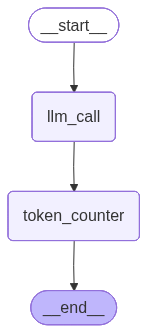

In [21]:
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
result = app.invoke({
    "messages": [HumanMessage(content="What is the capital of France?")]    
})

In [23]:
result

{'messages': [HumanMessage(content='What is the capital of France?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='The capital of France is Paris.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 14, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_373a14eb6f', 'id': 'chatcmpl-DAxz563fEnujKOLsEKwjebWyJzU1D', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c75ff-f204-7521-9a4c-9a50f32fb775-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 14, 'output_tokens': 7, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'rea

In [24]:
for m in result["messages"]:
    print(type(m).__name__, ":", m.content)

HumanMessage : What is the capital of France?
AIMessage : The capital of France is Paris.
AIMessage : Total token number in the generated answer (word count) is 6


In [25]:
chat_llm

ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'text_inputs': True, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'text_outputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x000001CE9FC47B10>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001CEA121D590>, root_client=<openai.OpenAI object at 0x000001CE9FB35250>, root_async_client=<openai.AsyncOpenAI object at 0x000001CEA121D090>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

In [26]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [27]:
api_wrapper = WikipediaAPIWrapper(top_k_results=5, doc_content_chars_max=500)

In [28]:
wiki_tool = WikipediaQueryRun(api_wrapper=api_wrapper)

In [29]:
wiki_tool.run({"query":"Generative AI"})

'Page: Generative artificial intelligence\nSummary: Generative artificial intelligence, also known as generative AI or GenAI, is a subfield of artificial intelligence that uses generative models to generate text, images, videos, audio, software code or other forms of data. These models learn the underlying patterns and structures of their training data, and use them to generate new data in response to input, which often takes the form of natural language prompts.\nThe prevalence of generative AI to'

In [30]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")

In [31]:
tool = TavilySearchResults(tavily_api_key=TAVILY_API_KEY)


C:\Users\Siva\AppData\Local\Temp\ipykernel_21832\1376842341.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tool = TavilySearchResults(tavily_api_key=TAVILY_API_KEY)


In [32]:
tool.invoke({"query": "Will AI replace IT jobs in future?"})

[{'title': 'AI and IT: How Artificial Intelligence Is Changing Information ...',
  'url': 'https://www.online.uc.edu/blog/how-ai-is-changing-it-jobs.html',
  'content': "Artificial Intelligence (AI) is increasingly being integrated into work solutions in virtually every industry. The field of IT is leading the charge, with nearly half of all IT departments at large organizations already incorporating AI into their work portfolios, designing and implementing AI technology to improve operations across organizations. As AI becomes more and more commonplace, IT professionals can’t help but wonder if some IT jobs will eventually be replaced by AI? The answer to this question continues to evolve with the capabilities of artificial intelligence. But there are some things the experts already agree on: [...] + Artificial intelligence is revolutionizing IT across all its functions: From network management and security to data analytics and service management, AI is automating tasks, improving ef

In [33]:
from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()

In [34]:
search.invoke({"query": "What is the capital of France?"})

Impersonate 'safari_17.5' does not exist, using 'random'


'Jan 31, 2026 · Paris is the capital and largest city of France, with an estimated city population of 2,047,602 in an area of 105.4 km2 (40.7 sq mi), and a metropolitan ... Jan 17, 2026 · Containing the capital city of France, Paris, it is located in the north-central part of the country and often called the Paris Region (French: Région ... Sep 1, 2025 · 1st with coming to Paris is the capital of France It is located in the north in the region of Ile de France (IIe-de-France), where a river flows through the ... Paris is ______ capital of France. (a) a (b) an (c) the - Facebook What country is Paris the capital of? - Facebook More results from www.facebook.com Jan 21, 2026 · Paris is the capital of France, a global iconic city where politics, art, and culture meet by the Seine. It is the house of the Elysee Palace and the National ... Dec 13, 2025 · Paris is the capital of France, known for its rich history, art, and iconic landmarks like the Eiffel Tower. · Paris, the capital of Franc

In [36]:
from langchain_community.tools import YouTubeSearchTool

In [37]:
yt_tool = YouTubeSearchTool()

In [38]:
yt_tool.name

'youtube_search'

In [39]:
yt_tool.description

'search for youtube videos associated with a person. the input to this tool should be a comma separated list, the first part contains a person name and the second a number that is the maximum number of video results to return aka num_results. the second part is optional'

In [40]:
yt_tool.run("sambasivarao tammavarapu")

"['https://www.youtube.com/watch?v=8uKvwe0c0EI&pp=ygUYc2FtYmFzaXZhcmFvIHRhbW1hdmFyYXB1', 'https://www.youtube.com/watch?v=gjn4pj-Ck8w&pp=ygUYc2FtYmFzaXZhcmFvIHRhbW1hdmFyYXB1']"

In [41]:
def multiply(a:int,b:int) -> int:
    return a * b    

In [42]:
multiply(10,20)

200

In [43]:
from langchain.tools import tool

In [45]:
@tool
def multiply(a:int,b:int) -> int:
    """AIMessage content should be the multiplication of a and b"""
    return a * b    

In [47]:
multiply.invoke({"a": 10, "b": 20})

200

In [56]:
@tool
def get_word_length(word:str) -> int:
    """it is a tool to count the length of the word"""
    return len(word)

In [59]:
get_word_length.invoke("Hello world")

11

In [60]:
import yfinance as yf

In [63]:
@tool
def get_stock_price(ticker:str) -> str:
    """This is a tool to get the current stock price of the given ticker symbol """
    try:
        stock = yf.Ticker(ticker)
        data = stock.history(period="1d")
        if data.empty:
            return f"No data found for ticker: {ticker}"
        latest_close = data['Close'].iloc[-1]

        currency = stock.info.get('currency', '')
        symbol_map = {
            'USD': '$',
            'EUR': '€',
            'GBP': '£',
            'JPY': '¥',
            'INR': '₹',
        }

        symbol = symbol_map.get(currency, '')
        currency_text = currency if currency else ""
        if symbol:
            return f"The current price of {ticker} is {symbol}{latest_close:.2f} {currency_text}"
        else:
            return f"The current price of {ticker} is {latest_close:.2f} {currency_text}"

    except Exception as e:
        return f"An error occurred: {str(e)}"

In [64]:
get_stock_price.invoke("TCS.NS")

'The current price of TCS.NS is ₹2677.90 INR'

In [66]:
get_stock_price.invoke("AAPL")

'The current price of AAPL is $264.35 USD'

In [67]:
get_stock_price.invoke("TSLA")

'The current price of TSLA is $411.32 USD'

In [68]:
get_stock_price.invoke("HDFC")

HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: HDFC"}}}
$HDFC: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")


'No data found for ticker: HDFC'

In [77]:
tools = [get_stock_price,get_word_length,get_stock_price, wiki_tool]

In [78]:
llm_with_tools = chat_llm.bind_tools(tools)

In [79]:
result = llm_with_tools.invoke("What si the stock price of TCS.NS")

In [80]:
result.content

''

In [81]:
result.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'TCS.NS'},
  'id': 'call_wWKtCBjs02wuIacXFRod9wCe',
  'type': 'tool_call'}]

In [ ]:
result = llm_with_tools.invoke("What si the stock price of TCS.NS")